In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from sklearn.datasets import make_blobs

In [2]:
def kmeans(points, k):
    """ 
    Vanilla implementation of k-means algorithm. 
    
    Inputs:
        points (array) - array of datapoints in 2d space
        k (int) - number of clusters
    Returns:
        means - centers of clusters
    """
    # initial random guess for the centers
    means = points.max()*np.random.rand(k,2)
    
    for i in xrange(100): # maxiter 100
        # used for checking convergence
        means_old = means.copy()
        
        # create kdtree for nearest neighbors search
        kdtree = cKDTree(means)

        # find closest mean point
        distance, z = kdtree.query(points, 1)

        # update means
        means = []
        for j in xrange(k):
            means.append(points[z==j].mean(axis=0))
        means = np.array(means)
            
        # check convergence
        if np.allclose(means_old, means):
            print "Convergence reached in {} iterations".format(i)
            return means
        
    # raise error for not converging 
    raise RuntimeError("Did not converge")

### The Dataset

In [3]:
points, clusters = make_blobs(n_samples=500, random_state=6534)

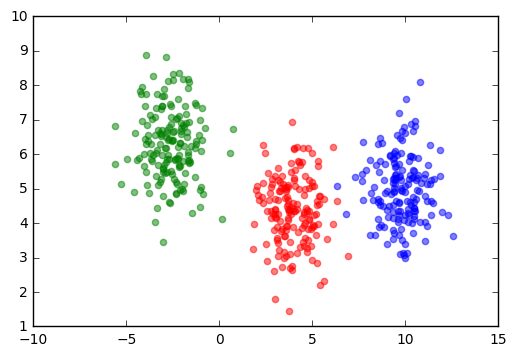

In [4]:
plt.scatter(points[clusters==0,0], points[clusters==0,1], color='r', alpha=.5)
plt.scatter(points[clusters==1,0], points[clusters==1,1], color='g', alpha=.5)
plt.scatter(points[clusters==2,0], points[clusters==2,1], color='b', alpha=.5)
plt.show()

### Analyze results

Convergence reached in 14 iterations


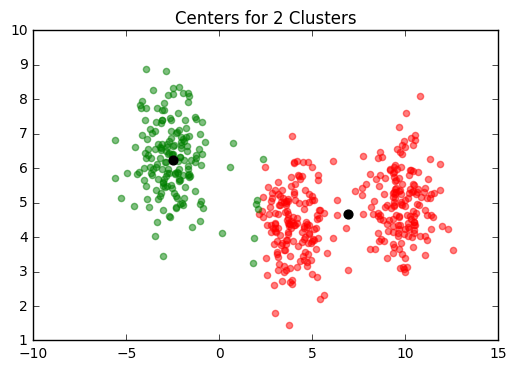

Convergence reached in 3 iterations


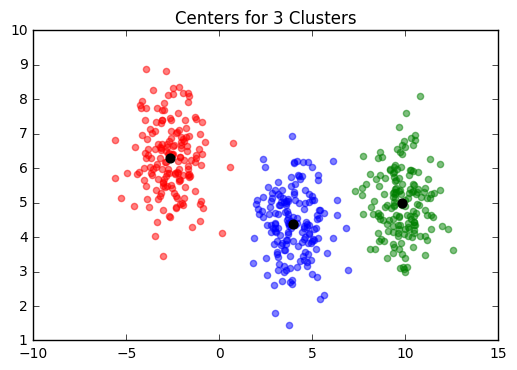

Convergence reached in 10 iterations


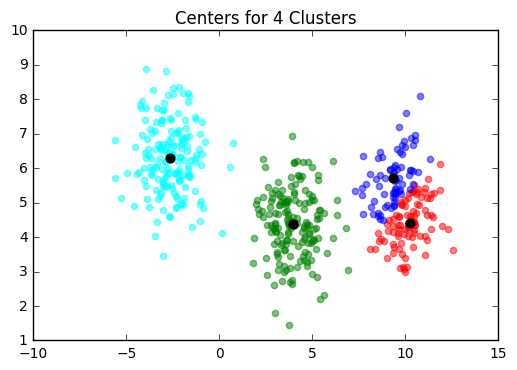

In [7]:
colors = ['red', 'green', 'blue', 'cyan']

for k in [2,3,4]:
    means = kmeans(points, k)
    kdtree = cKDTree(means)
    distance, z = kdtree.query(points, 1)

    for i in xrange(k):
        plt.scatter(points[z==i,0], points[z==i,1], color=colors[i], alpha=.5)
    plt.scatter(means[:,0], means[:,1], color='k', s=40)
    plt.title("Centers for {} Clusters".format(k))
    plt.show()